In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(forcats))


#get arguments
args <- commandArgs(trailingOnly = TRUE)
input_file <- args[1]
output_file <- args[2]

main <- function(){
    #read clean data
    crime <- read.csv(input_file)
    
    # crime type analysis
    crime_type_count <- crime %>% 
        group_by(Primary.Type) %>% 
        summarise(counts=n()) %>%
        arrange(desc(counts)) 
    crime_type_count <- crime_type_count %>% 
        mutate(Primary.Type = fct_reorder(Primary.Type, counts))
    
    crime_type_plot <- generate_bar(crime_type_count, Primary.Type)
    ggsave("crime_type_bar.png", plot = crime_type_plot, path = output_file,
         width = 6, height = 6)
    
    # crime location analysis
    crime_location_count <- crime %>% 
        group_by(Location.Description) %>% 
        summarise(counts=n()) %>%
        arrange(desc(counts))
    
}


generate_bar <- function(df, x, y, xlabel, ylabel, ttl){
    ggplot(aes(x, y)) +
    geom_bar(stat="identity", fill="#800000") +
    theme_bw() +
    guides(fill=FALSE) +
    labs(title=ttl, x=xlabel, y=ylabel) +
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  theme(axis.text.x=element_text(angle=90,hjust=1))
}

generate_bar_crimetype <- function(crime){
    crime %>% 
    mutate(Primary.Type = fct_reorder(Primary.Type, counts)) %>% 
    
    ggplot(aes(x=Primary.Type, y=counts)) +
    geom_bar(stat="identity", fill="#800000") +
    theme_bw() +
    guides(fill=FALSE) +
    labs(title="Top crimes in 2016-2017", x="Type of Crime", y="Count") +
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

generate_bar_crimeloc <- function(crime){
  crime %>% 
  mutate(Location.Description = fct_reorder(Location.Description, counts)) %>%  
  ggplot(aes(x=Location.Description, y=counts)) +
  geom_bar(stat="identity", fill="#800000") +
  theme_bw() +
  guides(fill=FALSE) +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  labs(title="Location of crimes in 2016-2017", x="Location", y="Count") +
  theme(axis.text.x=element_text(angle=90,hjust=1))
}

Warning message:
“package ‘dplyr’ was built under R version 3.5.1”

### Clean Data Load

In [5]:
# reading the data from "../data/crime_1617_clean_data.csv"
#crime <- read.csv("../data/crime_1617_clean_data.csv")

### Analysing the crimes in 2016 and 2017

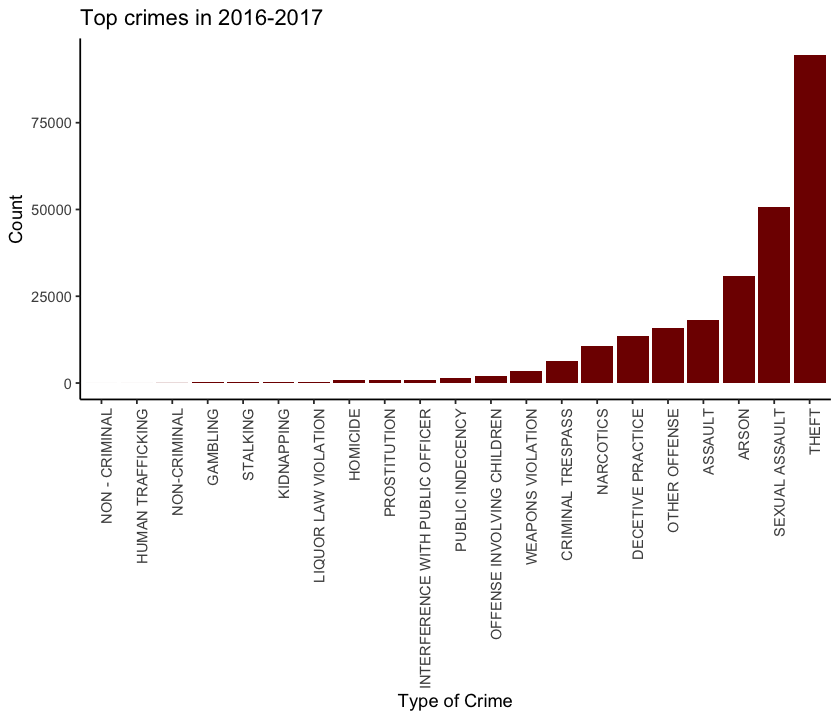

In [7]:
crime_count <- crime %>% 
  group_by(Primary.Type) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts))

#(crime_co_plot <- crime_count %>% 
#  head(10))

options(repr.plot.width = 7, repr.plot.height = 6)

crime_count %>% 
  mutate(Primary.Type = fct_reorder(Primary.Type, counts)) %>% 
  ggplot(aes(x=Primary.Type, y=counts)) +
  geom_bar(stat="identity", fill="#800000") +
  theme_bw() +
  guides(fill=FALSE) +
  labs(title="Top crimes in 2016-2017", x="Type of Crime", y="Count") +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  theme(axis.text.x=element_text(angle=90,hjust=1)) 

### Analysing the location of the crimes in 2016 and 2017 

Location.Description,counts
STREET,59363
RESIDENCE,40786
APARTMENT,31787
SIDEWALK,22413
OTHER,9950
PARKING LOT/GARAGE(NON.RESID.),7840
SMALL RETAIL STORE,5631
RESTAURANT,5411
RESIDENTIAL YARD (FRONT/BACK),5397
ALLEY,5130


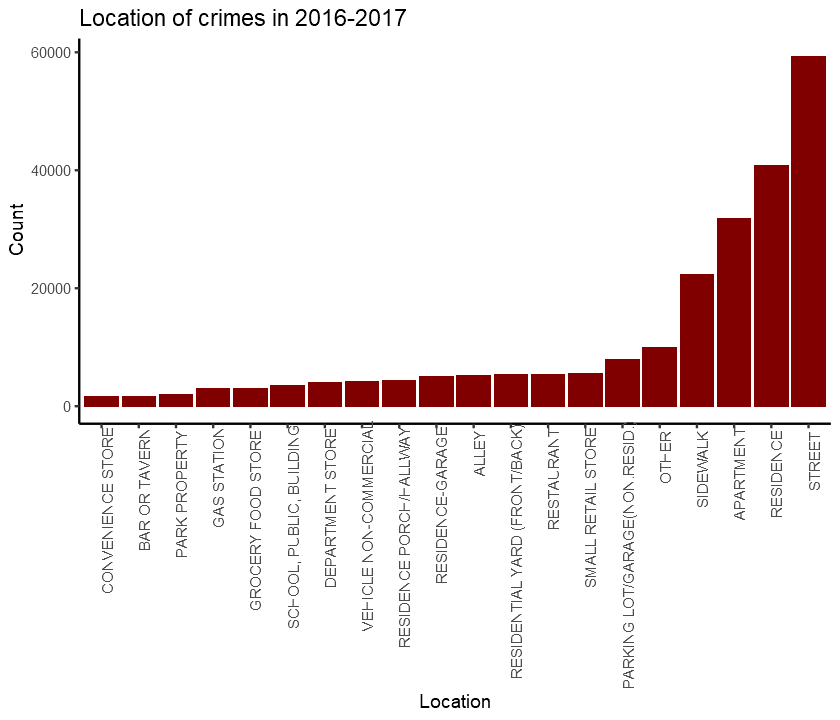

In [22]:
(crime_location <- crime %>% 
  group_by(Location.Description) %>% 
  summarise(counts=n()) %>%
  arrange(desc(counts)) %>% 
  head(20))

crime_loc_plot <- crime_location %>% 
  head(20)

options(repr.plot.width = 7, repr.plot.height = 6)

crime_loc_plot %>% 
  mutate(Location.Description = fct_reorder(Location.Description, counts)) %>%  
  ggplot(aes(x=Location.Description, y=counts)) +
  geom_bar(stat="identity", fill="#800000") +
  theme_bw() +
  guides(fill=FALSE) +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  labs(title="Location of crimes in 2016-2017", x="Location", y="Count") +
  theme(axis.text.x=element_text(angle=90,hjust=1))


### Analysing the number of crimes and arrests per year

In [9]:
# Counting the number of crimes per year
crime_year <- crime %>% 
  group_by(Year, Primary.Type) %>%
  summarise(crime_count=n())  

In [8]:
# Counting the number of arrests per year
arrest_year <- crime %>% 
  group_by(Year, Primary.Type) %>%
  filter(Arrest==1) %>%  
  summarise(arrest_count=n())

In [10]:
# Obtaining the crime count and arrest count for each type of crime per year
crime_arrest_year <- left_join(crime_year,arrest_year)
crime_arrest_year <- gather(crime_arrest_year, key = "crime_arrest", value = "value", arrest_count, crime_count)
#crime_arrest_year %>% head(10)

Joining, by = c("Year", "Primary.Type")


Selecting by value


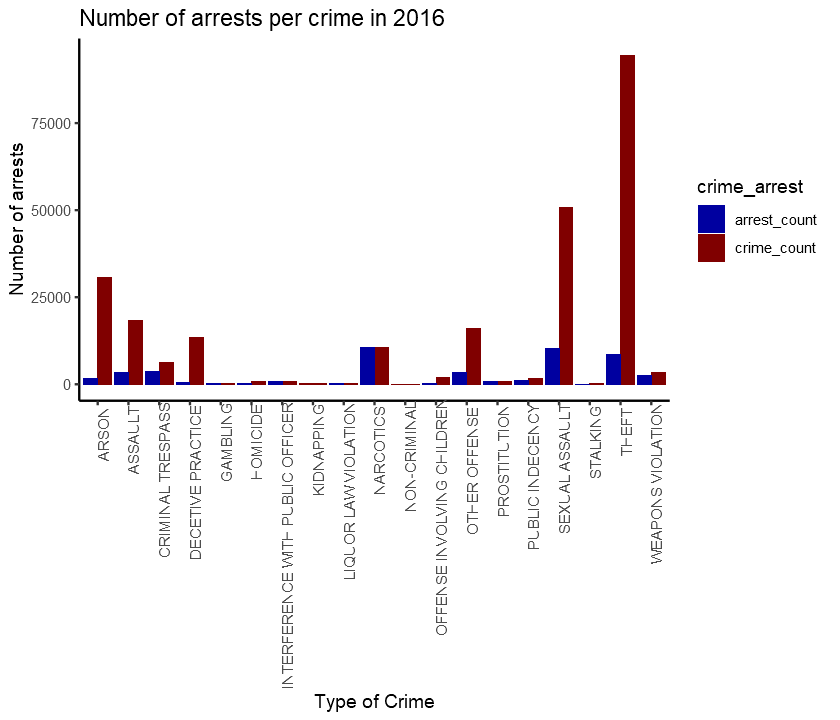

In [44]:
options(repr.plot.width = 7, repr.plot.height = 6)

crime_arrest_year %>% 
  top_n(35) %>% 
  filter(Year==2016) %>% 
  ggplot(aes(x=Primary.Type, y=value, fill=crime_arrest)) +
  geom_bar(position = "dodge", stat="identity") +
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  scale_fill_manual(values=c("#0000A0","#800000")) +
  labs(title="Number of arrests per crime in 2016", x="Type of Crime", y="Number of arrests") +
  theme(axis.text.x=element_text(angle=90,hjust=1))

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

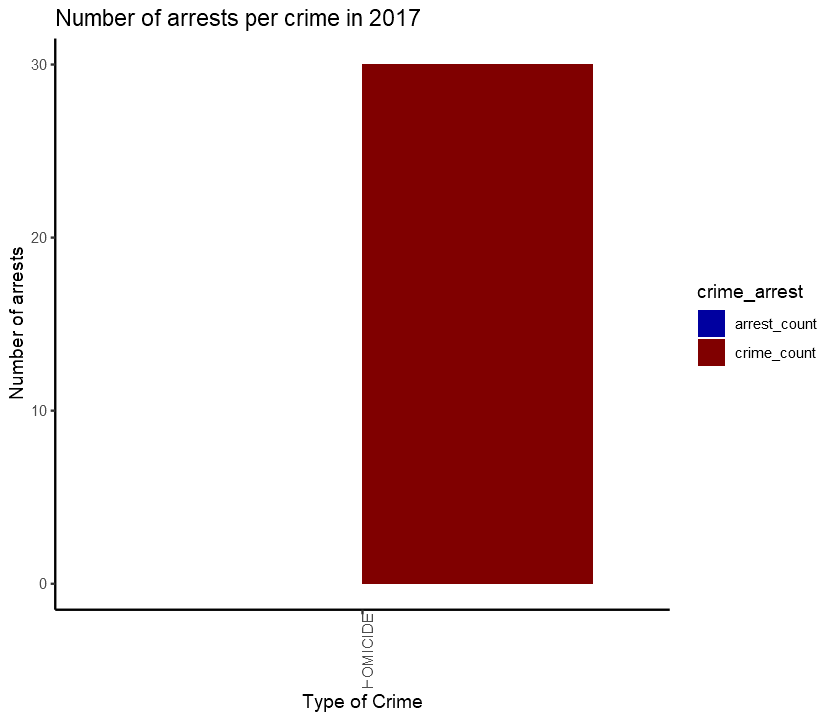

In [45]:
crime_arrest_year %>% 
  filter(Year==2017) %>% 
  ggplot(aes(x=Primary.Type, y=value, fill=crime_arrest)) +
  geom_bar(position = "dodge", stat="identity") +
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) +
  scale_fill_manual(values=c("#0000A0","#800000")) +
  labs(title="Number of arrests per crime in 2017", x="Type of Crime", y="Number of arrests") +
  theme(axis.text.x=element_text(angle=90,hjust=1))

In [49]:
(crime %>% 
  #top_n(35) %>% 
  filter(Year==2017))

Unnamed..0,X,ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,...,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location,Crime_Date,Crime_Time
264706,6223944,23059,JA100252,2017-01-01 05:19:00,046XX N BROADWAY,0110,HOMICIDE,FIRST DEGREE MURDER,TAVERN,...,01A,1167937,1930954,2017,01/08/2017 03:48:20 PM,41.96608,-87.65791,"(41.966081547, -87.657908498)",2017-01-01,05:19:00
264707,6223945,23060,JA100278,2017-01-01 06:18:00,046XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,...,01A,1145395,1899159,2017,01/08/2017 03:48:20 PM,41.87929,-87.74160,"(41.879290642, -87.741598513)",2017-01-01,06:18:00
266234,6225483,23061,JA102602,2017-01-03 12:20:00,034XX W FULTON BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,...,01A,1153437,1901785,2017,01/10/2017 03:59:07 PM,41.88634,-87.71200,"(41.886340707, -87.711999596)",2017-01-03,12:20:00
266235,6225484,23062,JA103468,2017-01-03 23:52:00,032XX W LEXINGTON ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,...,01A,1154943,1896522,2017,01/10/2017 03:59:07 PM,41.87187,-87.70661,"(41.871868444, -87.706610311)",2017-01-03,23:52:00
266846,6226105,23063,JA102602,2017-01-04 00:41:00,034XX W FULTON BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,...,01A,1153437,1901785,2017,01/11/2017 03:52:20 PM,41.88634,-87.71200,"(41.886340707, -87.711999596)",2017-01-04,00:41:00
266847,6226106,23064,JA103468,2017-01-04 05:59:00,032XX W LEXINGTON ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,...,01A,1154943,1896522,2017,01/11/2017 03:52:20 PM,41.87187,-87.70661,"(41.871868444, -87.706610311)",2017-01-04,05:59:00
267531,6226799,23065,JA105744,2017-01-05 23:30:00,008XX E 46TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,...,01A,1182638,1874692,2017,01/12/2017 03:52:48 PM,41.81137,-87.60561,"(41.811365671, -87.605610722)",2017-01-05,23:30:00
268148,6227428,23066,HZ564892,2017-01-06 01:43:00,086XX S MARYLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,...,01A,1183405,1847810,2017,01/13/2017 03:54:40 PM,41.73758,-87.60363,"(41.7375811, -87.603634068)",2017-01-06,01:43:00
268836,6228123,23067,JA107083,2017-01-07 10:07:00,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,...,01A,1167596,1893850,2017,01/14/2017 03:49:38 PM,41.86427,-87.66023,"(41.864273353, -87.660232974)",2017-01-07,10:07:00
270235,6229528,23068,JA109075,2017-01-09 10:07:00,045XX W LEXINGTON ST,0110,HOMICIDE,FIRST DEGREE MURDER,AUTO,...,01A,1146252,1896330,2017,01/16/2017 03:50:41 PM,41.87151,-87.73852,"(41.871511269, -87.738523703)",2017-01-09,10:07:00
